# An analysis of drug related crime in Seattle

Areas of narcotic manufacture are segregated from areas of sale and purchasing in downtown Seattle, with the Pike Market area being the main market for drug trade.

In this document we analyse crime data from Seattle and overlay it, after filtering out non-drug related data, onto a map of the region, and then concentrating on the downtown area.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv, re

# %matplotlib inline

In [2]:
# First let's get the data.
with open('seattle_incidents_summer_2014.csv') as f:
    content = f.readlines()

In [3]:
# Cleaning up the data - particularly the redundant field "Location", which has an awkward comma.
location_pattern = re.compile(r"\,\"\(\-*\d+\.\d+, \-*\d+\.\d+\)\"", re.IGNORECASE)
new_content = []
for line in content:
    new_content.append(location_pattern.sub("", line.replace("\n", "")).split(",")) # also get rid of carriage return
new_content[0].remove("Location")
print ("# of columns:", len(new_content[0]), "|Data:", new_content[0])
print ("# of columns:", len(new_content[1]), "|Data:", new_content[1])

# of columns: 18 |Data: ['RMS CDW ID', 'General Offense Number', 'Offense Code', 'Offense Code Extension', 'Offense Type', 'Summary Offense Code', 'Summarized Offense Description', 'Date Reported', 'Occurred Date or Date Range Start', 'Occurred Date Range End', 'Hundred Block Location', 'District/Sector', 'Zone/Beat', 'Census Tract 2000', 'Longitude', 'Latitude', 'Month', 'Year']
# of columns: 18 |Data: ['483839', '2015218538', '2202', '0', 'BURGLARY-FORCE-RES', '2200', 'BURGLARY', '06/28/2015 10:31:00 AM', '06/28/2014 10:31:00 AM', '06/28/2015 10:31:00 AM', '6XX BLOCK OF NW 74 ST', 'J', 'J2', '2900.3013', '-122.364671996', '47.68252427', '6', '2014']


In [4]:
# Transform data into a Numpy array
crime_data = np.array(new_content)
print(crime_data[0])
print (crime_data[1])

['RMS CDW ID' 'General Offense Number' 'Offense Code'
 'Offense Code Extension' 'Offense Type' 'Summary Offense Code'
 'Summarized Offense Description' 'Date Reported'
 'Occurred Date or Date Range Start' 'Occurred Date Range End'
 'Hundred Block Location' 'District/Sector' 'Zone/Beat' 'Census Tract 2000'
 'Longitude' 'Latitude' 'Month' 'Year']
['483839' '2015218538' '2202' '0' 'BURGLARY-FORCE-RES' '2200' 'BURGLARY'
 '06/28/2015 10:31:00 AM' '06/28/2014 10:31:00 AM' '06/28/2015 10:31:00 AM'
 '6XX BLOCK OF NW 74 ST' 'J' 'J2' '2900.3013' '-122.364671996'
 '47.68252427' '6' '2014']


In [5]:
data_size = len(crime_data)
print( "We have %s data points" %(data_size - 1))  # Header does not count :)

We have 32779 data points


In [6]:
# Create a dictionary of offenses, so we can have an idea of the range of issues we can work with
offense_codes = {}
for i in range(1, data_size):
    code = crime_data[i][2]
    if code not in offense_codes.keys():
        offense_codes[code] = crime_data[i][4]
print (offense_codes)

{'2202': 'BURGLARY-FORCE-RES', '2610': 'FRAUD-IDENTITY THEFT', '2316': 'THEFT-MAIL', '2599': 'COUNTERFEIT', '2399': 'THEFT-OTH', '2308': 'THEFT-BUILDING', '2605': 'FRAUD-CREDIT CARD', '2606': 'FRAUD-CHECK', '2799': 'EMBEZZLE', '2205': 'BURGLARY-NOFORCE-NONRES', '2699': 'FRAUD-OTHER', '2305': 'THEFT-CARPROWL', '5309': 'HARASSMENT', '2304': 'THEFT-AUTOACC', '2204': 'BURGLARY-NOFORCE-RES', '2903': 'PROPERTY DAMAGE-NON RESIDENTIA', 'X': 'PROPERTY LOST', '2501': 'FORGERY-CHECK', '2404': 'VEH-THEFT-AUTO', '2299': 'BURGLARY-SECURE PARKING-RES', '2301': 'THEFT-PKPOCKET', '1316': 'THREATS-OTHER', '3510': 'NARC-SELL-HEROIN', '1305': 'ASSLT-AGG-WEAPON', '5015': 'WARRARR-MISDEMEANOR', '1306': 'ASSLT-AGG-BODYFORCE', '2902': 'PROPERTY DAMAGE-RESIDENTIAL', '2999': 'PROPERTY DAMAGE - GRAFFITI', '1313': 'ASSLT-NONAGG', '2608': 'FRAUD-WIRE-ELECTRONIC', '5499': 'TRAFFIC', '2203': 'BURGLARY-FORCE-NONRES', '2802': 'PROPERTY STOLEN-TRAFFICKING', '2303': 'THEFT-SHOPLIFT', '5016': 'VIOL-COURT ORDER', '4002': 

In [7]:
# Let's have a look at those offenses related to drug use and sale
print ("Sale of drugs: ")
print (offense_codes['3571'])
print (offense_codes['3560'])
print (offense_codes['3510'])
print (offense_codes['3530'])
print (offense_codes['3540'])
print (offense_codes['4199'])

print ("\nManufacture of drugs")
print (offense_codes['3550'])
print (offense_codes['3563'])

print ("\nPossession of drugs")
print (offense_codes['3572'])
print (offense_codes['3562'])
print (offense_codes['3512'])
print (offense_codes['3532'])
print (offense_codes['3542'])
print (offense_codes['3504'])
print (offense_codes['3599'])

print ("\nDrug abuse")
print (offense_codes['5404'])
print (offense_codes['5403'])

Sale of drugs: 
NARC-SELL-AMPHETAMINE
NARC-SELL-MARIJU
NARC-SELL-HEROIN
NARC-SELL-COCAINE
NARC-SELL-METH
LIQUOR LAW VIOLATION

Manufacture of drugs
NARC-EQUIPMENT/PARAPHENALIA
NARC-PRODUCE-MARIJU

Possession of drugs
NARC-POSSESS-AMPHETAMINE
NARC-POSSESS-MARIJU
NARC-POSSESS-HEROIN
NARC-POSSESS-COCAINE
NARC-POSSESS-METH
NARC-POSSESS-HALLUCINOGEN
NARC-POSSESS-OTHER

Drug abuse
DUI-LIQUOR
DUI-DRUGS


In [8]:
drug_sale_mask = (crime_data[:,2] == '3571') + \
                  (crime_data[:,2] == '3560') + \
                  (crime_data[:,2] == '3510') + \
                  (crime_data[:,2] == '3530') + \
                  (crime_data[:,2] == '3540') + \
                  (crime_data[:,2] == '4199')
drug_manu_mask = (crime_data[:,2] == '3550') + \
                  (crime_data[:,2] == '3563')
drug_poss_mask = (crime_data[:,2] == '3572') + \
                  (crime_data[:,2] == '3562') + \
                  (crime_data[:,2] == '3512') + \
                  (crime_data[:,2] == '3532') + \
                  (crime_data[:,2] == '3542') + \
                  (crime_data[:,2] == '3504') + \
                  (crime_data[:,2] == '3599')
drug_abus_mask = (crime_data[:,2] == '5404') + \
                  (crime_data[:,2] == '5403')

In [9]:
#  I am interested in seeing the relationships on this data, so let's create some subsets:
drug_sale_crime = crime_data[drug_sale_mask]
drug_manufacture_crime = crime_data[drug_manu_mask]
drug_possession_crime = crime_data[drug_poss_mask]
drug_abuse_crime = crime_data[drug_abus_mask]

In [10]:
drug_sale_crime

array([['1106608', '2014354720', '3510', ..., '47.498700563', '6', '2014'],
       ['1086935', '2014288494', '3510', ..., '47.586366433', '8', '2014'],
       ['110427', '2014288494', '3510', ..., '47.586366433', '8', '2014'],
       ..., 
       ['57140', '2014178531', '4199', ..., '47.615473377', '6', '2014'],
       ['1124470', '2014177710', '3530', ..., '47.727348714', '6', '2014'],
       ['57339', '2014177710', '3530', ..., '47.727348714', '6', '2014']],
      dtype='<U47')

In [11]:
# I am interested in seeing where these crimes are more prevalent, so I will overlay the data into a map.
# But first I need to find the corners of the map.
x, y = -4, -3
latitudes = crime_data[1:,y]
longitudes = crime_data[1:,x]
print ("south - east corner:", min(latitudes), min(longitudes))
print ("north - west corner:", max(latitudes), max(longitudes))

south - east corner: 0 -122.238969938
north - west corner: 47.74960605 0


In [12]:
# OK, we seem to have dirty data where the lat/lon are recorded as 0... Let's list how many of those we have.
print (len(crime_data[crime_data[:,y] == '0'][:,4]))
print (len(crime_data[crime_data[:,x] == '0'][:,4]))

2050
2050


In [13]:
# Let's filter those values out then:
crime_data = crime_data[crime_data[:,y] != '0']

In [14]:
print (len(crime_data[crime_data[:,y] == '0'][:,4]))
latitudes = crime_data[1:,y]
longitudes = crime_data[1:,x]
print ("south - east corner:", min(latitudes), min(longitudes))
print ("north - west corner:", max(latitudes), max(longitudes))
top = min(latitudes)
left = max(longitudes)
bottom = max(latitudes)
right = min(longitudes)
print ("top:", top)
print ("left:", left)
print ("bottom", bottom)
print ("right", right)

0
south - east corner: 47.465062973 -122.238969938
north - west corner: 47.74960605 -122.425315024
top: 47.465062973
left: -122.425315024
bottom 47.74960605
right -122.238969938


In [15]:
# We'll do the same for our drug crime subsets:
drug_sale_crime = drug_sale_crime[drug_sale_crime[:,y] != '0']
drug_manufacture_crime = drug_manufacture_crime[drug_manufacture_crime[:,y] != '0']
drug_possession_crime = drug_possession_crime[drug_possession_crime[:,y] != '0']
drug_abuse_crime = drug_abuse_crime[drug_abuse_crime[:,y] != '0']

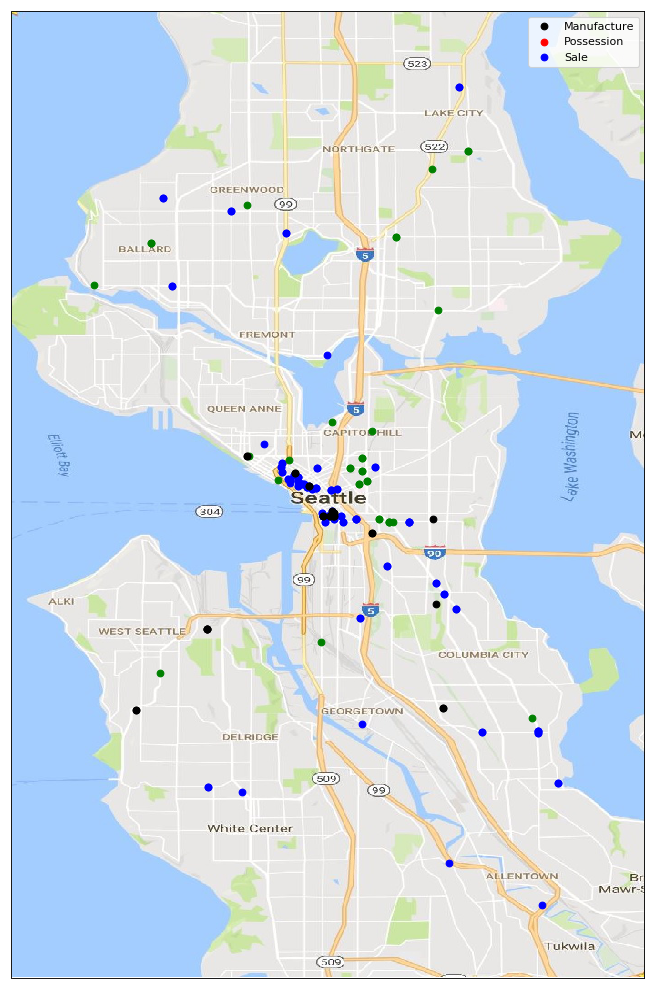

In [16]:
# And now off to plot some data:
from scipy.misc import imread
import matplotlib.cbook as cbook
#from PIL import Image
#import requests
#from StringIO import StringIO
import matplotlib as mpl
mpl.rcParams['examples.directory'] = './'
datafile = cbook.get_sample_data('Seattle.JPG')
img = imread(datafile)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
possession = plt.scatter(drug_possession_crime[:,x],drug_possession_crime[:,y], zorder=5, color='red', label='Possession')
sale = plt.scatter(drug_sale_crime[:,x],drug_sale_crime[:,y], zorder=2, color='blue', label='Sale')
abuse = plt.scatter(drug_abuse_crime[:,x],drug_abuse_crime[:,y], zorder=3, color='green', label='Abuse')
manufacture = plt.scatter(drug_manufacture_crime[:,x],drug_manufacture_crime[:,y], zorder=4, color='black', label='Manufacture')
plt.legend(handles=[manufacture, possession, sale])
plt.imshow(img, zorder=0, extent=[-122.425315024, -122.238969938, 47.465062973, 47.74960605])
plt.show()

In [ ]:
# OK, that's looking good. There seems to be a concentration of data in the city centre, which is unsurprising.

In [ ]:
# Let's zoom in to the downtown area
top = 47.583003
left = -122.357062
bottom = 47.633579
right = -122.312086

# First reduce the data set by using a boolean mask
# Note that the coordinates are strings, and so we need to treat negative numbers as positives.
sale_dt_mask = (drug_sale_crime[:,x] < str(left)) + (drug_sale_crime[:,x] > str(right)) + \
               (drug_sale_crime[:,y] > str(bottom)) + (drug_sale_crime[:,y] < str(top))
poss_dt_mask = (drug_possession_crime[:,x] < str(left)) + (drug_possession_crime[:,x] > str(right)) + \
               (drug_possession_crime[:,y] > str(bottom)) + (drug_possession_crime[:,y] < str(top))
abus_dt_mask = (drug_abuse_crime[:,x] < str(left)) + (drug_abuse_crime[:,x] > str(right)) + \
               (drug_abuse_crime[:,y] > str(bottom)) + (drug_abuse_crime[:,y] < str(top))
manu_dt_mask = (drug_manufacture_crime[:,x] < str(left)) + (drug_manufacture_crime[:,x] > str(right)) + \
               (drug_manufacture_crime[:,y] > str(bottom)) + (drug_manufacture_crime[:,y] < str(top))

In [ ]:
drug_sale_crime = drug_sale_crime[sale_dt_mask]
drug_possession_crime = drug_possession_crime[poss_dt_mask]
drug_abuse_crime = drug_abuse_crime[abus_dt_mask]
drug_manufacture_crime = drug_manufacture_crime[manu_dt_mask]

In [ ]:
# Now to plot the new figure
datafile = cbook.get_sample_data('Seattle_Downtown.JPG')
img = imread(datafile)
fig=plt.figure(figsize=(20, 12), dpi= 80, facecolor='w', edgecolor='k')
sale = plt.scatter(drug_sale_crime[:,x],drug_sale_crime[:,y], zorder=1, color='blue', label='Sale')
possession = plt.scatter(drug_possession_crime[:,x],drug_possession_crime[:,y], zorder=1, color='red', label='Possession')
abuse = plt.scatter(drug_abuse_crime[:,x],drug_abuse_crime[:,y], zorder=1, color='green', label='Abuse')
manufacture = plt.scatter(drug_manufacture_crime[:,x],drug_manufacture_crime[:,y], zorder=1, color='black', label='Manufacture')
plt.legend(handles=[sale, possession, abuse, manufacture])
plt.imshow(img, zorder=0, extent=[-122.357062, -122.312086, 47.583003, 47.633579])
plt.show()

It seems clear from the above maps that there is a concentration of narcotic manufacturing and distribution 
in the Pioneer Square area of downtown Seattle, whereas in the Pike Place market we see sale and purchasing activity.
There is also a drug possession and abuse correlation going on in the Capitol Hill area.